----

# **Hierarchical Clustring Different Techniques**

## **Author**   :  **Muhammad Adil Naeem**

## **Contact**   :   **madilnaeem0@gmail.com**
<br>

----

### **Importing Libraries**

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.cluster import AgglomerativeClustering
from sklearn.preprocessing import StandardScaler, normalize
from sklearn.metrics import silhouette_score

import scipy.cluster.hierarchy as shc

import warnings
warnings.filterwarnings('ignore')

### **Load dataset**

In [2]:
df = pd.read_csv('/content/Mall_customers.csv')

### **First 5 rows of dataset**

In [3]:
df.head()

,CustomerID,Gender,Age,Annual Income (k$),Spending Score (1-100)
0,1,Male,19,15,39
1,2,Male,21,15,81
2,3,Female,20,16,6
3,4,Female,23,16,77
4,5,Female,31,17,40


### **Detailed Information of Dataset**

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 5 columns):
 #   Column                  Non-Null Count  Dtype 
---  ------                  --------------  ----- 
 0   CustomerID              200 non-null    int64 
 1   Gender                  200 non-null    object
 2   Age                     200 non-null    int64 
 3   Annual Income (k$)      200 non-null    int64 
 4   Spending Score (1-100)  200 non-null    int64 
dtypes: int64(4), object(1)
memory usage: 7.9+ KB


### **Statistical Description of Numerical Columns**

In [5]:
df.describe()

,CustomerID,Age,Annual Income (k$),Spending Score (1-100)
count,200.000000,200.000000,200.000000,200.000000
mean,100.500000,38.850000,60.560000,50.200000
std,57.879185,13.969007,26.264721,25.823522
min,1.000000,18.000000,15.000000,1.000000
25%,50.750000,28.750000,41.500000,34.750000
50%,100.500000,36.000000,61.500000,50.000000
75%,150.250000,49.000000,78.000000,73.000000
max,200.000000,70.000000,137.000000,99.000000


- We will ignore Age.


In [6]:
df1 = df.iloc[:,3:5].values

- This code extracts the values from the DataFrame `df` for columns 3 to 4 (inclusive of column 3 and exclusive of column 5) and assigns them to a new variable `df1`. The result is a NumPy array containing the data from these specified columns.

### **Dendrogram Visualization of Customers Using Hierarchical Clustering**

- This code creates a dendrogram to visualize the hierarchical clustering of customer data stored in `df1`. It sets the figure size to 10x7 inches, titles the plot "Customers Dendrogram," and uses the Ward method to compute the linkage for clustering, helping to illustrate the relationships between different customer groups.

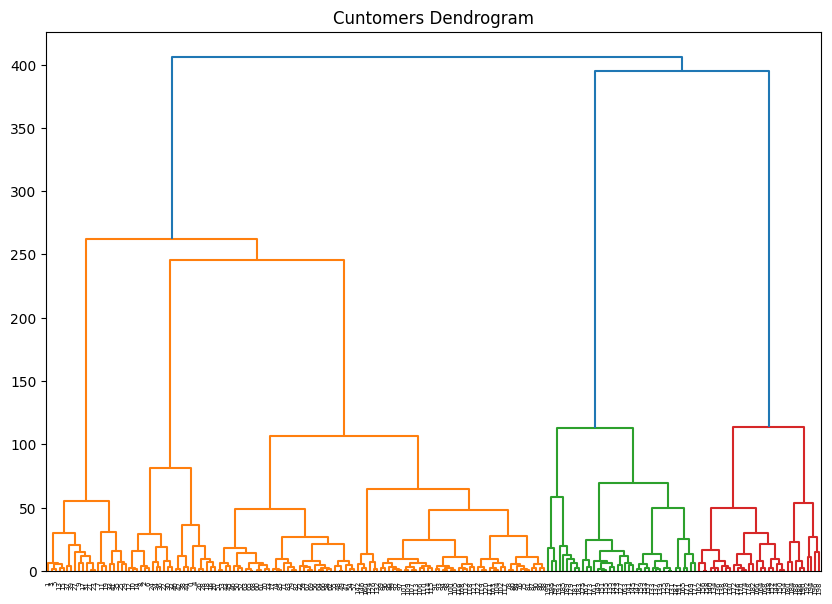

In [7]:
plt.figure(figsize=(10,7))
plt.title('Cuntomers Dendrogram')
dend = shc.dendrogram(shc.linkage(df1, method='ward'))

## **Agglomerative Clustering of Customer Data into 5 Groups**

- This code initializes an Agglomerative Clustering model to group the data in `df1` into 5 clusters using the Euclidean distance for measuring affinity and the Ward method for linkage. It then fits the model to the data and assigns cluster labels to each data point, storing the results in the variable `labels`.

In [8]:
model = AgglomerativeClustering(n_clusters=5, affinity='euclidean', linkage='ward')
labels = model.fit_predict(df1)
labels

array([4, 3, 4, 3, 4, 3, 4, 3, 4, 3, 4, 3, 4, 3, 4, 3, 4, 3, 4, 3, 4, 3,
       4, 3, 4, 3, 4, 3, 4, 3, 4, 3, 4, 3, 4, 3, 4, 3, 4, 3, 4, 3, 4, 1,
       4, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 1, 2, 1, 2, 0, 2, 0, 2,
       1, 2, 0, 2, 0, 2, 0, 2, 0, 2, 1, 2, 0, 2, 1, 2, 0, 2, 0, 2, 0, 2,
       0, 2, 0, 2, 0, 2, 1, 2, 0, 2, 0, 2, 0, 2, 0, 2, 0, 2, 0, 2, 0, 2,
       0, 2, 0, 2, 0, 2, 0, 2, 0, 2, 0, 2, 0, 2, 0, 2, 0, 2, 0, 2, 0, 2,
       0, 2])

### **Scatter Plot of Clustered Customer Data**

- This code creates a scatter plot to visualize the clustered customer data from `df1`, using a figure size of 10x7 inches. Each point is colored according to its assigned cluster label from the Agglomerative Clustering model, with the color map set to 'rainbow', and then displays the plot.

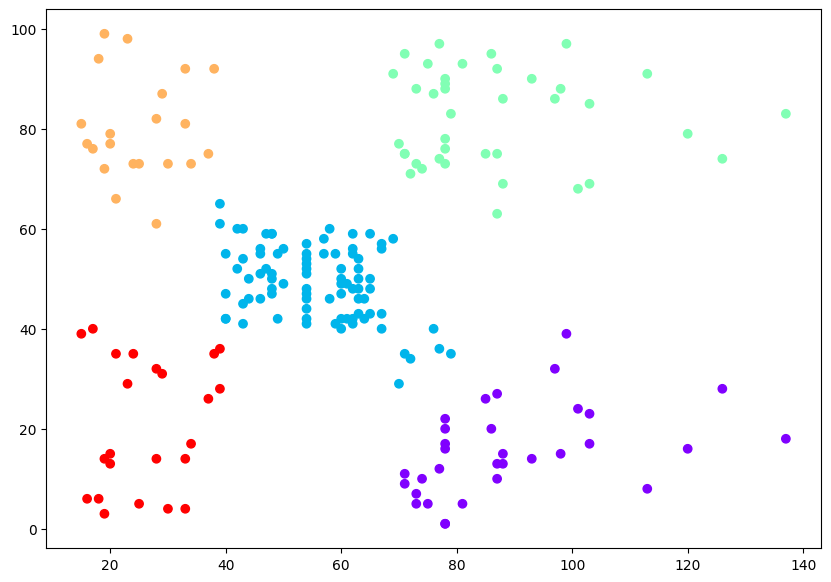

In [10]:
plt.figure(figsize=(10,7))
plt.scatter(df1[:,0], df1[:,1],c = model.labels_ , cmap='rainbow')
plt.show()

### **Same plot with seaborn**

- **Data Preparation**: The code assumes `df1` contains the data points. It creates a new DataFrame `df_seaborn` which includes two feature columns and the cluster labels.
- **Figure Size**: The plot size is set to 10x7 inches for better visibility.
- **Scatter Plot**: A scatter plot is created using Seaborn, where points are colored based on their cluster labels. The `palette='rainbow'` option adds a gradient of colors.
- **Title and Labels**: The plot includes a title and axis labels for clarity.
- **Annotations**: Each point is annotated with its corresponding cluster label to provide additional context.
- **Legend and Grid**: A legend is added to identify clusters, and a grid is included for easier readability.

This enhanced visualization provides a clearer understanding of how customers are grouped based on the selected features.

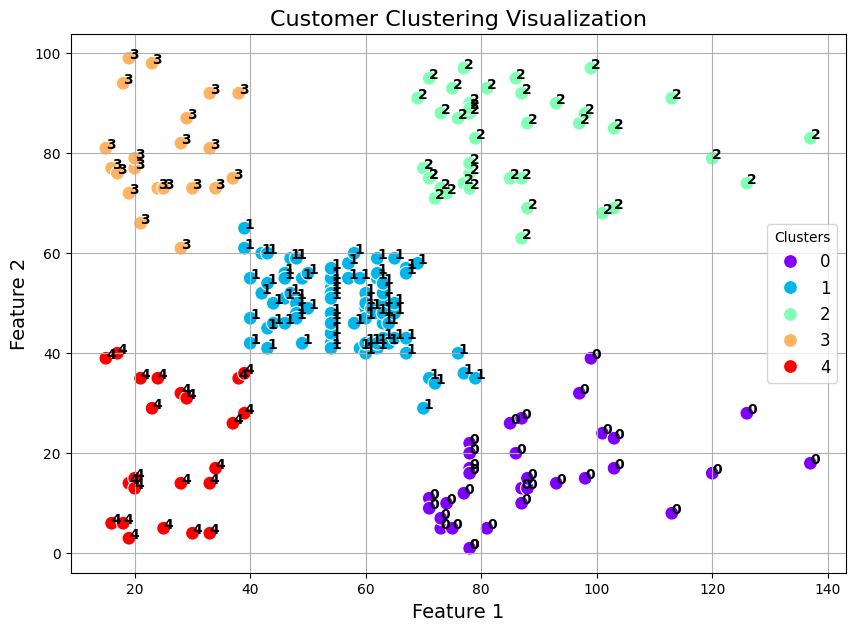

In [11]:
import seaborn as sns
import matplotlib.pyplot as plt
import pandas as pd

df_seaborn = pd.DataFrame(df1, columns=['Feature 1', 'Feature 2'])
df_seaborn['Cluster'] = model.labels_

plt.figure(figsize=(10, 7))

# Create a scatter plot with Seaborn
scatter = sns.scatterplot(data=df_seaborn, x='Feature 1', y='Feature 2', hue='Cluster', palette='rainbow', s=100)

# Add title and labels
plt.title('Customer Clustering Visualization', fontsize=16)
plt.xlabel('Feature 1', fontsize=14)
plt.ylabel('Feature 2', fontsize=14)

# Add annotations for clarity
for i in range(len(df_seaborn)):
    scatter.text(df_seaborn['Feature 1'][i], df_seaborn['Feature 2'][i], str(df_seaborn['Cluster'][i]),
                 horizontalalignment='left', size='medium', color='black', weight='semibold')

plt.legend(title='Clusters', fontsize=12)
plt.grid(True)
plt.show()